In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import pandas as pd

from expected_tackling.visualization import Explainer

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
features_data = pd.read_csv("../data/features_mott.csv")
tackling_probability = pd.read_csv("../data/tackling_probability.csv")

In [4]:
model = pickle.load(open("../models/model_mott.pkl", "rb"))

In [5]:
y = features_data["pff_missedTackle"].astype(int)
X = features_data[features_data["ott"]<10].drop(
    columns=["gameId", "playId", "nflId", "opportunityId","frameId","pff_missedTackle"]
)

y_pred = pd.Series(model.predict(X), name="prediction", index=X.index)
sample = pd.concat([y_pred[y_pred==1], y_pred[y_pred==0].sample(len(y_pred[y_pred==1]))]).index

explainer = Explainer(X.loc[sample], y.loc[sample], model)

In [7]:
probability_result_data = tackling_probability.groupby(["gameId", "playId", "nflId"])["tackling_probability"].max().to_frame().reset_index()
probability_result_data = probability_result_data.merge(features_data, on=["gameId", "playId", "nflId"])
probability_result_data["prediction"] = y_pred
probability_result_data["Original player action"] = "Nothing"
probability_result_data.loc[(probability_result_data["tackle_or_assist"]==1), "Original player action"] = "Tackle or assist"
probability_result_data.loc[(probability_result_data["pff_missedTackle"]==1), "Original player action"] = "PFF missed tackle"
probability_result_data["Transformed player action"] = "Nothing"
probability_result_data.loc[(probability_result_data["tackle_or_assist"]==1), "Transformed player action"] = "Tackle or assist"
probability_result_data.loc[(probability_result_data["prediction"]==1), "Transformed player action"] = "Predicted MOTT"

<Axes: title={'center': 'Player max tackling probability on the play'}, xlabel='[Original player action]'>

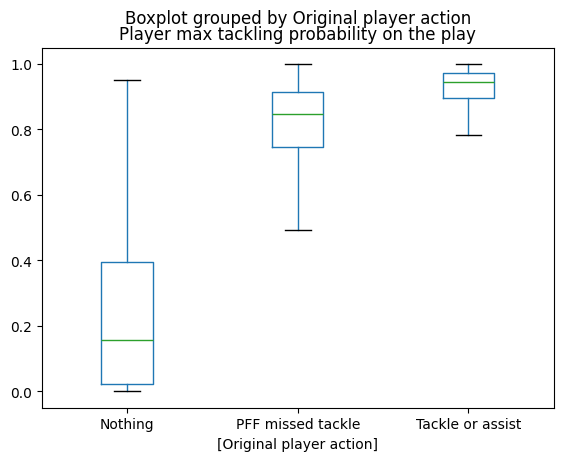

In [8]:
probability_result_data[["tackling_probability", "Original player action"]].rename(
    columns={"tackling_probability": "Player max tackling probability on the play"}
).boxplot(by="Original player action", grid=False, showfliers=False)

<Axes: title={'center': 'Player max tackling probability on the play'}, xlabel='[Transformed player action]'>

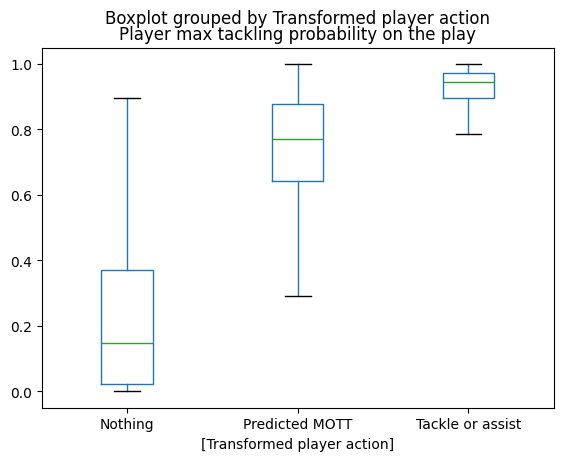

In [9]:
probability_result_data[["tackling_probability", "Transformed player action"]].rename(
    columns={"tackling_probability": "Player max tackling probability on the play"}
).boxplot(by="Transformed player action", grid=False, showfliers=False)

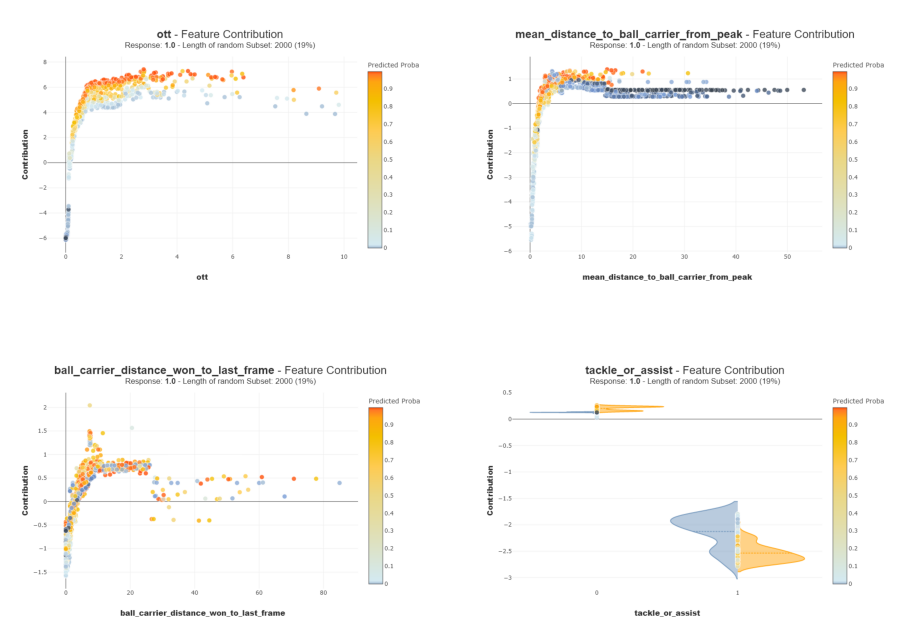

In [13]:
explainer.plot_contributions_examples(
    ["ott", "mean_distance_to_ball_carrier_from_peak", "ball_carrier_distance_won_to_last_frame", "tackle_or_assist"],
    "mott_contributions_examples",
)

In [ ]:
app = explainer.run_app()

c:\Users\mleca\Anaconda3\envs\nfl_bowl\lib\site-packages\shapash\webapp\smart_app.py:121: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

c:\Users\mleca\Anaconda3\envs\nfl_bowl\lib\site-packages\shapash\webapp\utils\utils.py:41: FutureWarning:

Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead

INFO:root:Your Shapash application run on http://DESKTOP-UHH8TPO:8050/


Dash is running on http://0.0.0.0:8050/



INFO:root:Use the method .kill() to down your app.
INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app 'shapash.webapp.smart_app'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://192.168.1.90:8050
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 17:07:46] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 17:07:46] "GET /assets/style.css?m=1699629195.7540402 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 17:07:46] "GET /assets/material-icons.css?m=1699629195.746562 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 17:07:46] "GET /_dash-component-suites/dash/deps/react@16.v2_3_1m1699636093.14.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 17:07:46] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_3_1m1699636093.14.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 17:07:46] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_3_1m1699636093.12